In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
plt.style.use('ggplot')

In [154]:
df = pd.read_csv('/content/drive/MyDrive/Учеба/Мага/Анализ данных на Python (Аббакумов)/ЛР 1-3/digit.dat', delimiter=';')
df

,A,B,C,D,E,F,G,H,A2,B2,C2,D2,E2,F2,G2,H2
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,five,ONE,ONE,ZERO,ONE,ZERO,ONE,ONE,five,ONE,ONE,ZERO,ONE,ZERO,ONE,ONE
496,seven,ONE,ZERO,ONE,ONE,ONE,ONE,ZERO,seven,ONE,ZERO,ONE,ONE,ONE,ONE,ZERO
497,four,ZERO,ZERO,ONE,ONE,ONE,ZERO,ZERO,four,ZERO,ZERO,ONE,ONE,ONE,ZERO,ZERO
498,zero,ONE,ONE,ONE,ZERO,ZERO,ONE,ZERO,zero,ONE,ONE,ONE,ZERO,ZERO,ONE,ZERO


In [155]:
df = df.map(lambda x: x.strip())
df = df.T.drop_duplicates().T
df

,A,B,C,D,E,F,G,H
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE
...,...,...,...,...,...,...,...,...
495,five,ONE,ONE,ZERO,ONE,ZERO,ONE,ONE
496,seven,ONE,ZERO,ONE,ONE,ONE,ONE,ZERO
497,four,ZERO,ZERO,ONE,ONE,ONE,ZERO,ZERO
498,zero,ONE,ONE,ONE,ZERO,ZERO,ONE,ZERO


In [156]:
df.replace('ONE', 1, inplace=True)
df.replace('ZERO', 0, inplace=True)
df

/tmp/ipython-input-2194124162.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('ZERO', 0, inplace=True)


,A,B,C,D,E,F,G,H
0,seven,1,0,1,0,0,1,0
1,one,0,0,1,0,0,1,0
2,four,0,1,1,1,0,1,0
3,two,1,1,1,1,1,0,0
4,eight,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
495,five,1,1,0,1,0,1,1
496,seven,1,0,1,1,1,1,0
497,four,0,0,1,1,1,0,0
498,zero,1,1,1,0,0,1,0


In [157]:
X = df.drop(['A'], axis=1).values
Y = df['A'].values
df_vanilla = df.copy()

# Иерархическая кластеризация

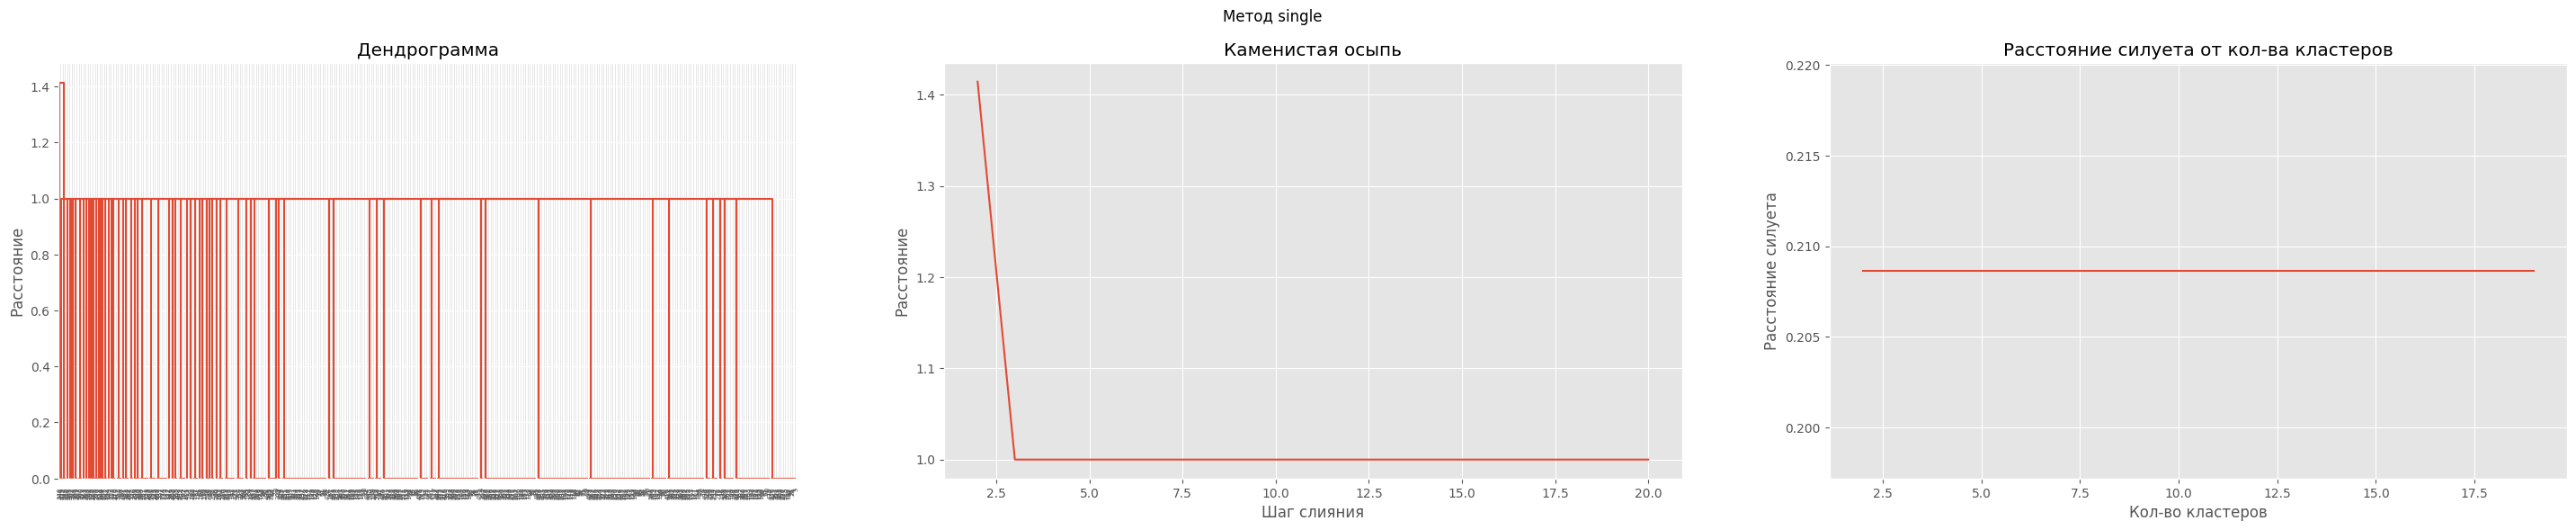

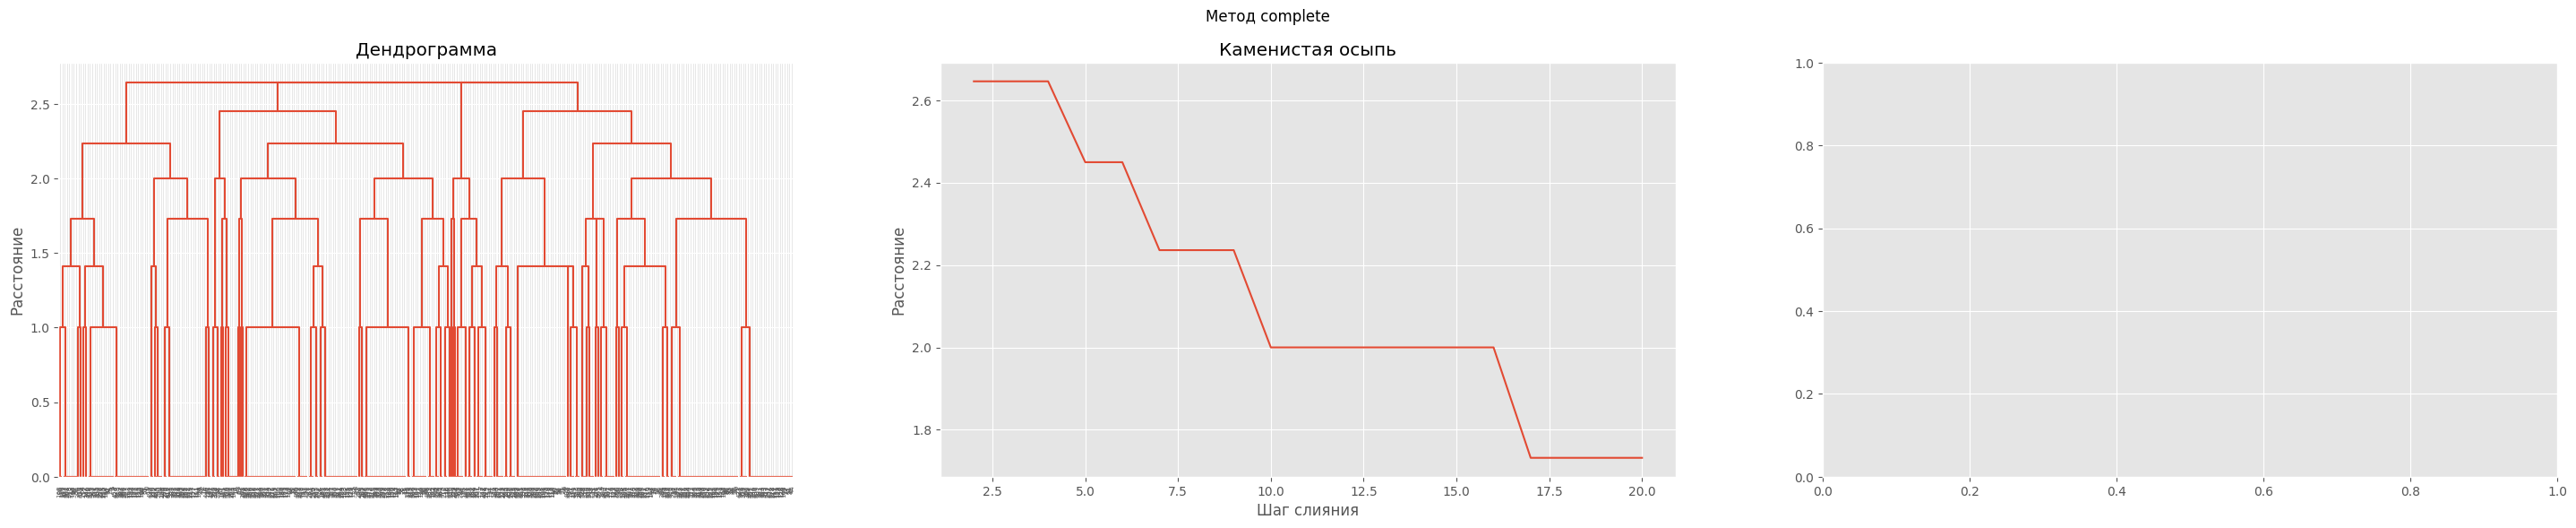

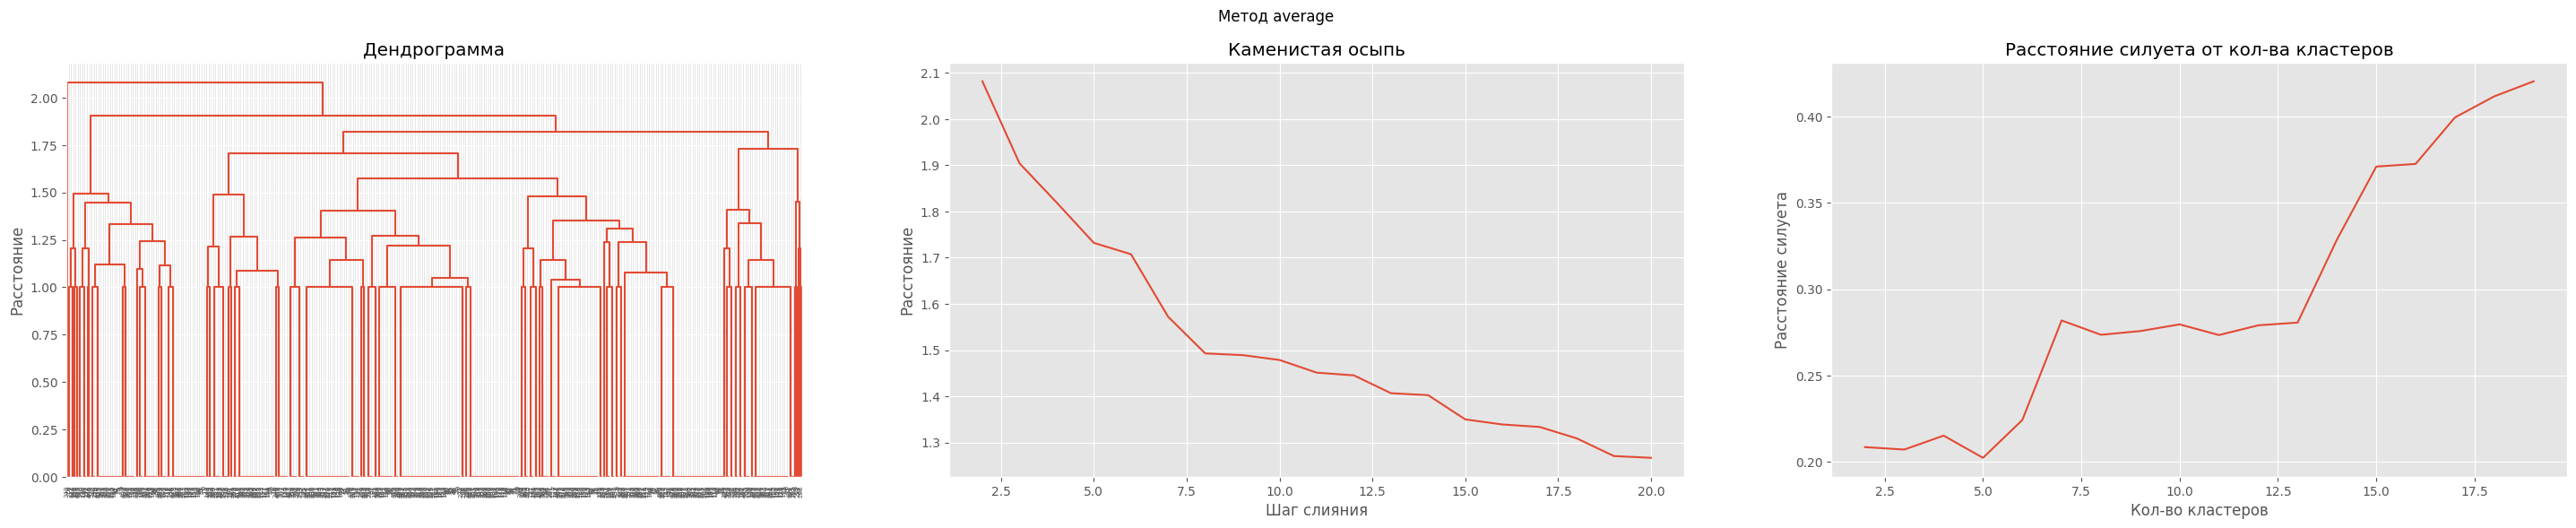

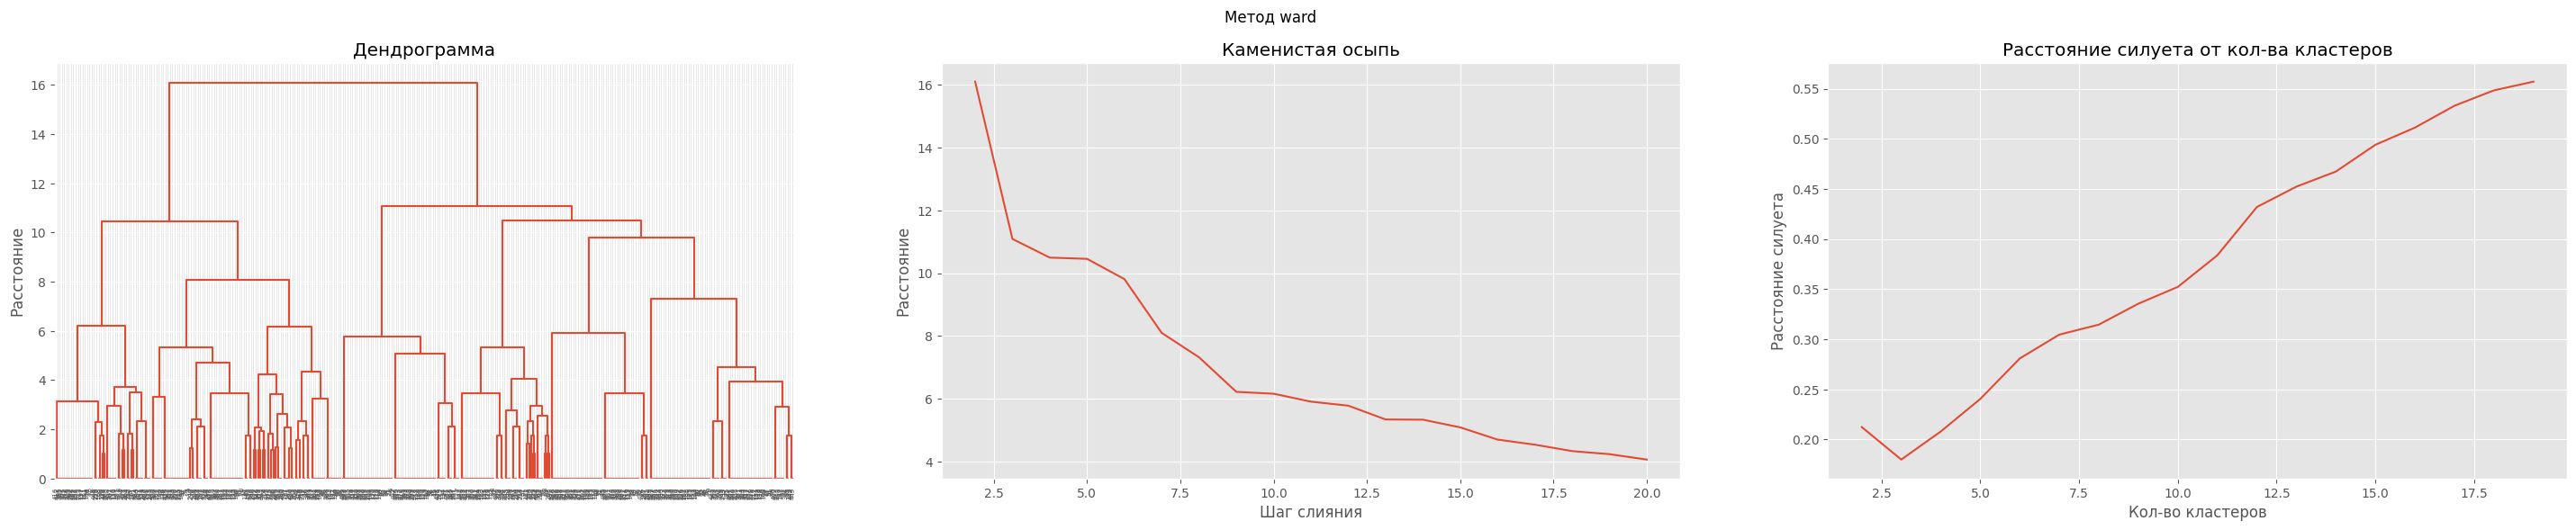

In [131]:
from sklearn.metrics import silhouette_score
def plot_clusterisation(method, range_clusters = range(2, 20)):
  linked_data = linkage(X, method=method)
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(36, 6))
  dendrogram(linked_data, color_threshold=-1, ax=ax1)
  ax1.set_title('Дендрограмма')
  ax1.set_ylabel('Расстояние')

  distances = linked_data[:, 2]
  show_last_n = 19
  ax2.plot(range(show_last_n + 1, 1, -1), distances[-show_last_n:])
  ax2.set_xlabel('Шаг слияния')
  ax2.set_ylabel('Расстояние')
  ax2.set_title('Каменистая осыпь')

  silhouette_lst = []
  silhouette_flg = True
  for cl_cnt in range_clusters:
    labels = fcluster(linked_data, cl_cnt, criterion='maxclust')
    if len(np.unique(labels)) <= 1:
      silhouette_flg = False
      break
    silhouette_lst.append(silhouette_score(X, labels))
  if silhouette_flg:
    ax3.plot(range_clusters, silhouette_lst)
    ax3.set_xlabel('Кол-во кластеров')
    ax3.set_ylabel('Расстояние силуета')
    ax3.set_title('Расстояние силуета от кол-ва кластеров')
  fig.suptitle(f'Метод {method}')
  plt.show()

methods =['single', 'complete', 'average', 'ward']
for m in methods:
  plot_clusterisation(m)

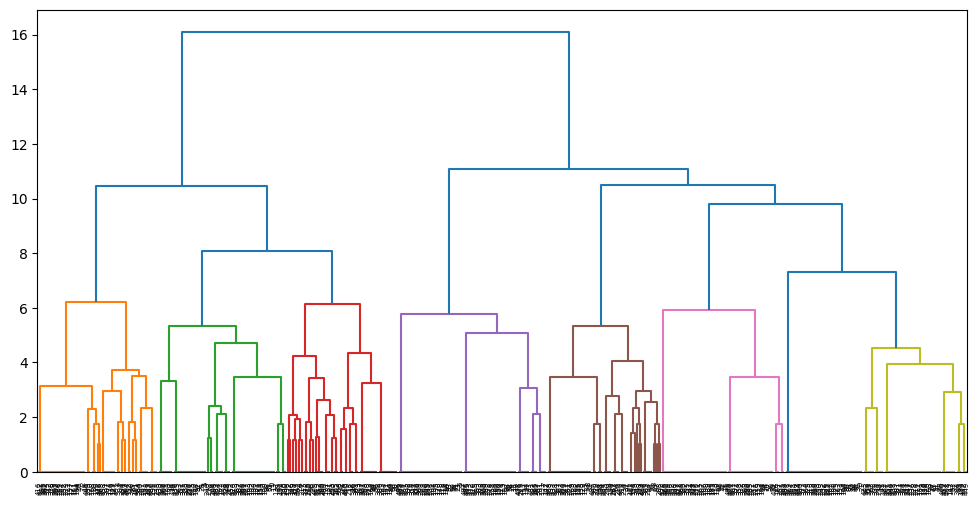

In [139]:
fig = plt.figure(figsize=(12, 6))
linked_data = linkage(X, method='ward')
dendrogram(linked_data, color_threshold=7);

In [133]:
labels = fcluster(linked_data, 8, criterion='maxclust')
np.unique(labels_dist, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
 array([65, 69, 60, 80, 61, 67, 42, 56]))

In [134]:
df['cluster'] = labels
df

,A,B,C,D,E,F,G,H,cluster
0,seven,1,0,1,0,0,1,0,2
1,one,0,0,1,0,0,1,0,2
2,four,0,1,1,1,0,1,0,1
3,two,1,1,1,1,1,0,0,5
4,eight,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
495,five,1,1,0,1,0,1,1,4
496,seven,1,0,1,1,1,1,0,3
497,four,0,0,1,1,1,0,0,5
498,zero,1,1,1,0,0,1,0,2


In [135]:
df_grouped_by_cluster = df.groupby('cluster').mean(numeric_only=True)

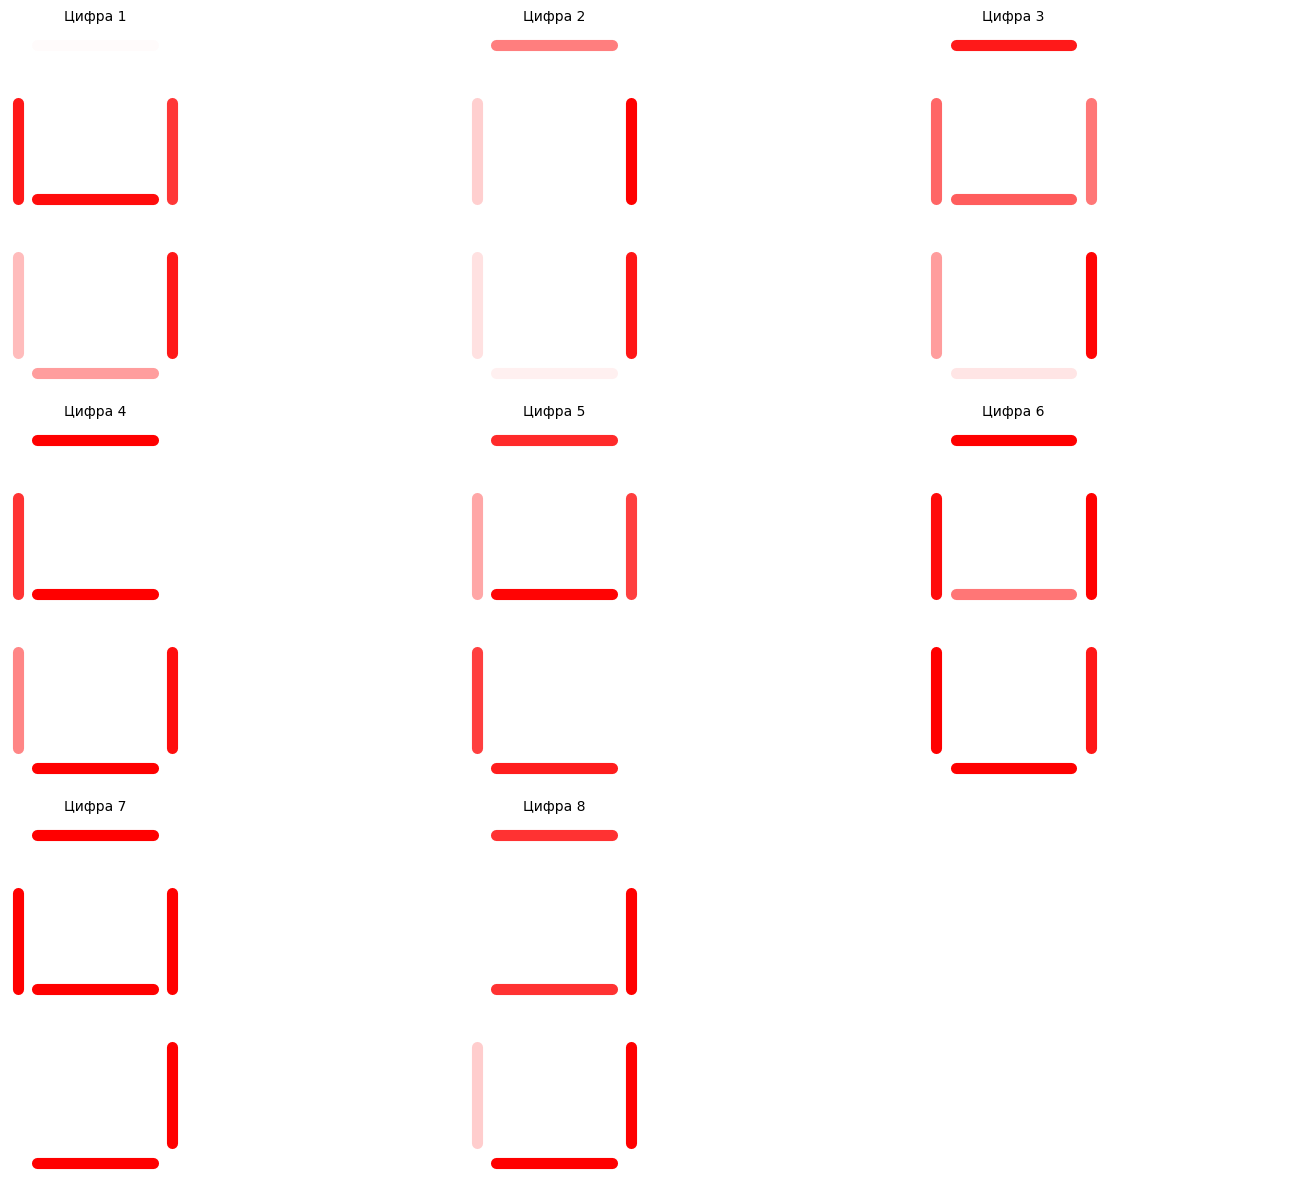

In [136]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_multiple_seven_segments(df, ncols=5, figsize=(5,4)):
    nrows = (len(df) + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=(figsize[0]*ncols, figsize[1]*nrows))
    if nrows == 1:
        axes = axes.reshape(1, -1)
    elif ncols == 1:
        axes = axes.reshape(-1, 1)

    segments = {
        'B': ((0.2, 1.8), (0.8, 1.8)),  # верхняя горизонтальная
        'C': ((0.1, 1.5), (0.1, 1.0)),  # левый верхний вертикальный
        'D': ((0.9, 1.5), (0.9, 1.0)),  # правый верхний вертикальный
        'E': ((0.2, 1.0), (0.8, 1.0)),  # средняя горизонтальная
        'F': ((0.1, 0.7), (0.1, 0.2)),  # левый нижний вертикальный
        'G': ((0.9, 0.7), (0.9, 0.2)),  # правый нижний вертикальный
        'H': ((0.2, 0.1), (0.8, 0.1))   # нижняя горизонтальная
    }

    for idx, (i, row) in enumerate(df.iterrows()):
        row_idx = idx // ncols
        col_idx = idx % ncols

        ax = axes[row_idx, col_idx] if nrows > 1 else axes[col_idx]
        ax.set_aspect('equal')
        ax.axis('off')


        for seg in segments:
            alpha = float(row.get(seg, 0))
            if alpha > 0:
                (x1, y1), (x2, y2) = segments[seg]
                ax.plot([x1, x2], [y1, y2], color='red', linewidth=8,
                       alpha=alpha, solid_capstyle='round')

        ax.set_title(f'Цифра {i}', fontsize=10)

    for idx in range(len(df), nrows * ncols):
        row_idx = idx // ncols
        col_idx = idx % ncols
        axes[row_idx, col_idx].axis('off')

    plt.tight_layout()
    plt.show()


plot_multiple_seven_segments(df_grouped_by_cluster, ncols=3)

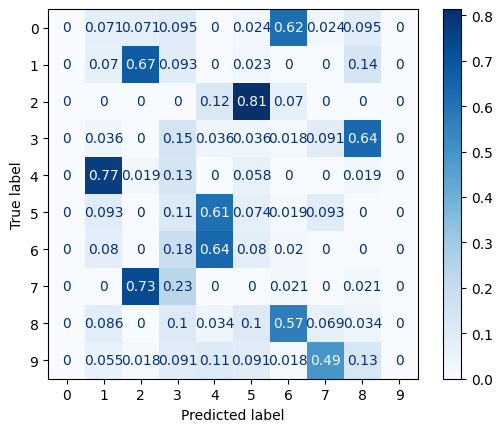

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.style.use('default')
digit_map = {
        'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
        'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9
  }
df['true_label'] = df['A'].map(digit_map)

cm = confusion_matrix(df['true_label'], df['cluster'], normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

Интерпретация:
1. Кластер 1: цифра 4
2. Кластер 2: цифры 1 и 7
3. Кластер 3: смесь 3, 4, 5, 6, 7
4. Кластер 4: цифры 5, 6
5. Кластер 5: цифра 2
6. Кластер 6: цифры 0 и 8
7. Кластер 7: цифра 9
8. Кластер 8: цифра 3


# Кластеризация K-Means

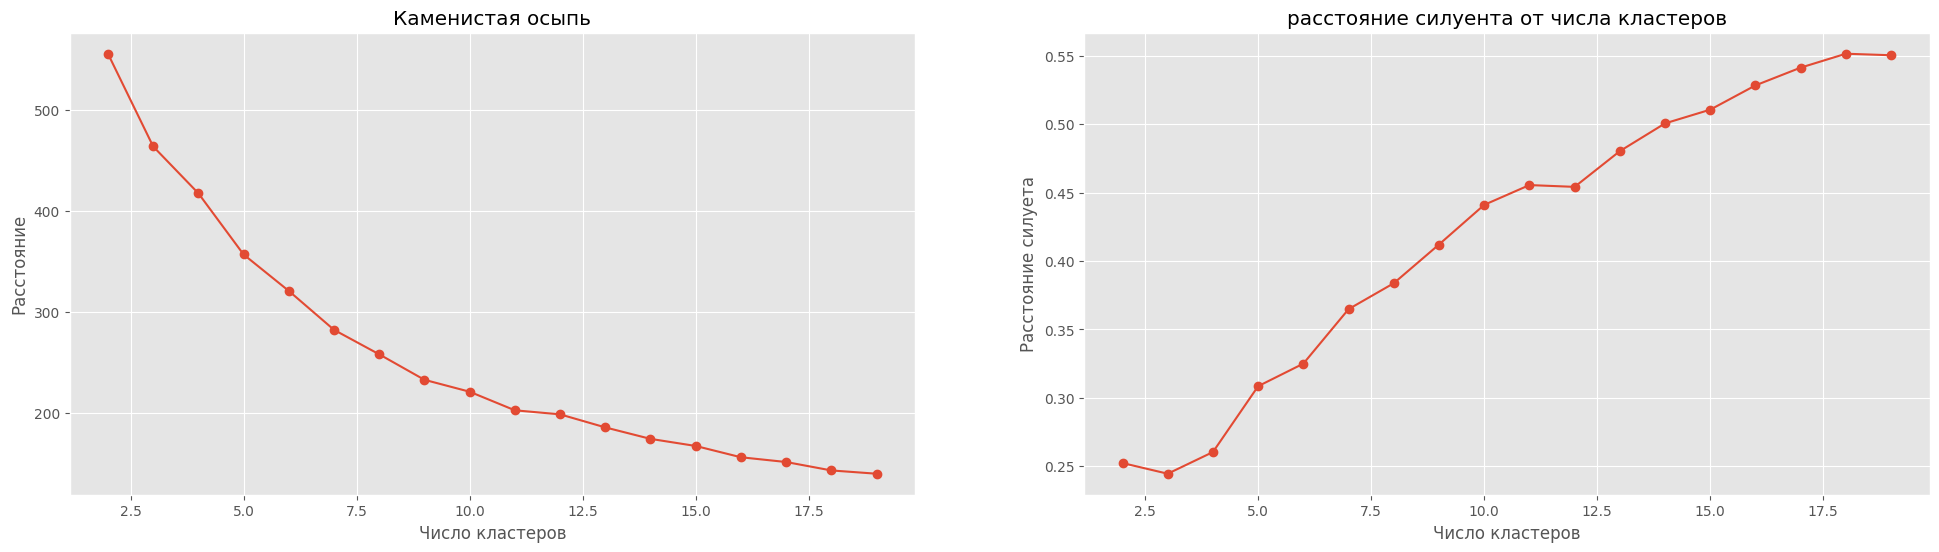

In [158]:
from sklearn.cluster import KMeans
plt.style.use('ggplot')
dist = []
silhouette_lst = []
clusters_range = range(2, 20)

for clust in clusters_range:
    clf = KMeans(n_clusters = clust, max_iter=300, n_init=10, random_state=42)
    clf.fit(X)

    silhouette_lst.append(silhouette_score(X, clf.labels_))
    dist.append(clf.inertia_)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))
ax1.plot(clusters_range, dist, marker='o')
ax1.set_xlabel('Число кластеров')
ax1.set_ylabel('Расстояние')
ax1.set_title('Каменистая осыпь')


ax2.plot(clusters_range, silhouette_lst, marker='o')
ax2.set_xlabel('Число кластеров')
ax2.set_ylabel('Расстояние силуета')
ax2.set_title('расстояние силуента от числа кластеров')



plt.show()
plt
plt.show()

In [159]:
clf = KMeans(n_clusters=11, max_iter=300, n_init=10, random_state=42)
clf.fit(X)

KMeans(n_clusters=11, n_init=10, random_state=42)

In [149]:
np.unique(clf.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32),
 array([57, 50, 54, 44, 59, 44, 44, 54, 43, 10, 41]))

In [160]:
df = df_vanilla.copy()
df['cluster'] = clf.labels_
df_grouped_by_cluster = df.groupby('cluster').mean(numeric_only=True)
df_grouped_by_cluster

,B,C,D,E,F,G,H
cluster,,,,,,,
0,0.894737,0.859649,0.000000,0.947368,0.000000,0.964912,0.929825
1,0.880000,0.000000,0.980000,1.000000,0.040000,1.000000,0.740000
2,0.944444,0.851852,1.000000,1.000000,1.000000,0.925926,0.944444
3,0.000000,0.000000,0.863636,0.136364,0.227273,0.909091,0.136364
4,0.847458,1.000000,1.000000,0.932203,0.000000,0.915254,1.000000
5,0.931818,0.931818,0.840909,0.000000,1.000000,0.886364,0.840909
6,0.250000,1.000000,0.977273,0.909091,0.045455,1.000000,0.000000
7,0.833333,0.907407,0.000000,1.000000,1.000000,0.851852,0.851852
8,0.906977,0.000000,0.813953,0.930233,0.837209,0.000000,0.976744


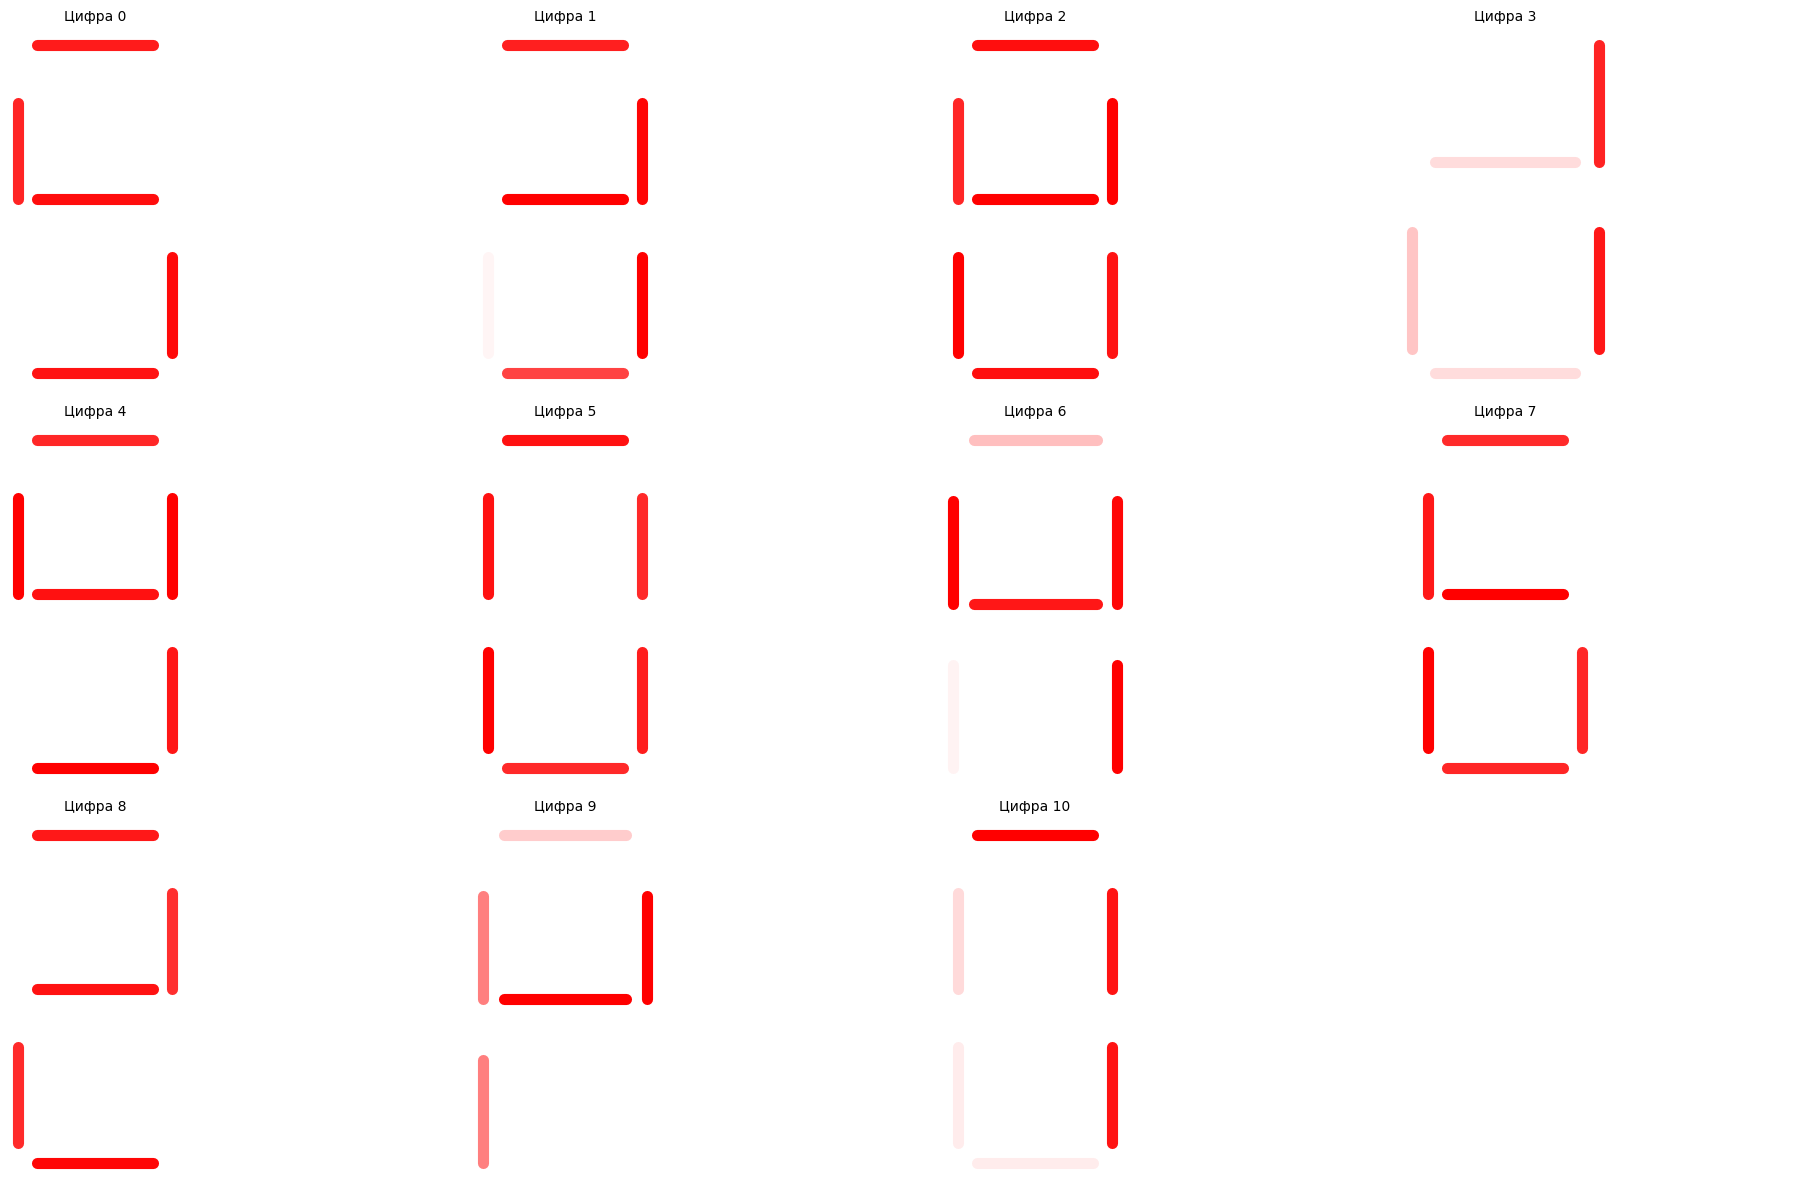

In [163]:
plot_multiple_seven_segments(df_grouped_by_cluster, ncols=4)

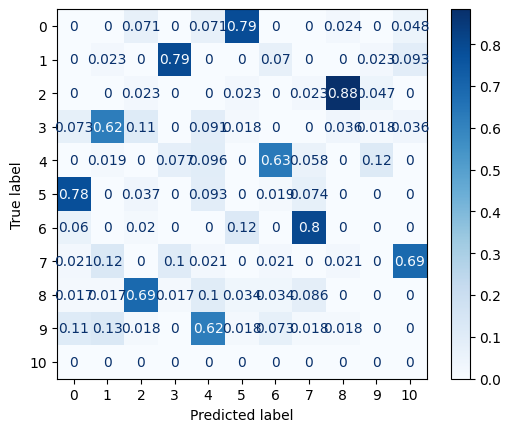

In [165]:
plt.style.use('default')
digit_map = {
        'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
        'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9
  }
df['true_label'] = df['A'].map(digit_map)

cm = confusion_matrix(df['true_label'], df['cluster'], normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

#Интерпретация:

1. Кластер 0: цифра 5
2. Кластер 1: цифра 3
3. Кластер 2: цифра 8
4. Кластер 3: цифрв 1
5. Кластер 4: цифра 9
6. Кластер 5: цифра 1
7. Кластер 6: цифра 4
8. Кластер 7: цифра 8
9. Кластер 8: цифра 2
10. Кластер 9: невнятный кластер
11. Кластер 10: цифра 7


# Кластеризация DBSCAN

In [178]:
from sklearn.cluster import DBSCAN

eps_range = [0.3, 0.9, 1.5]
min_samples_range = range(5, 15)

for eps in eps_range:
  silhouette_lst = []
  for m in min_samples_range:
    clf = DBSCAN(eps = eps, min_samples=m)
    clf.fit(X)
    if len(np.unique(clf.labels_)) < 2:
      continue
    if len(np.unique(clf.labels_)) > 15:
      continue
    silhouette_lst.append((silhouette_score(X, clf.labels_), eps, m))
    print(f'------------EPS={eps}, min_samples={m}---------------')
    print(f'Кол-во кластеров {len(np.unique(clf.labels_))}')
    print(f'Расстояние силуета: {silhouette_score(X, clf.labels_)}')
    print(np.unique(clf.labels_, return_counts=True)[1])

------------EPS=0.3, min_samples=9---------------
Кол-во кластеров 13
Расстояние силуета: 0.4693087400414732
[189  24  18  26  35  24  42  36  29  11  25  31  10]
------------EPS=0.3, min_samples=10---------------
Кол-во кластеров 13
Расстояние силуета: 0.4693087400414732
[189  24  18  26  35  24  42  36  29  11  25  31  10]
------------EPS=0.3, min_samples=11---------------
Кол-во кластеров 12
Расстояние силуета: 0.4436199714243058
[199  24  18  26  35  24  42  36  29  11  25  31]
------------EPS=0.3, min_samples=12---------------
Кол-во кластеров 11
Расстояние силуета: 0.413861592420154
[210  24  18  26  35  24  42  36  29  25  31]
------------EPS=0.3, min_samples=13---------------
Кол-во кластеров 11
Расстояние силуета: 0.413861592420154
[210  24  18  26  35  24  42  36  29  25  31]
------------EPS=0.3, min_samples=14---------------
Кол-во кластеров 11
Расстояние силуета: 0.413861592420154
[210  24  18  26  35  24  42  36  29  25  31]
------------EPS=0.9, min_samples=9--------------

In [184]:
clf = DBSCAN(eps=0.9, min_samples=12)
clf.fit(X)

DBSCAN(eps=0.9, min_samples=12)

In [185]:
df = df_vanilla.copy()
df['cluster'] = clf.labels_
df_grouped_by_cluster = df.groupby('cluster').mean(numeric_only=True)
df_grouped_by_cluster

,B,C,D,E,F,G,H
cluster,,,,,,,
-1,0.614286,0.504762,0.652381,0.666667,0.457143,0.714286,0.533333
0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
1,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
2,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
3,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
4,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
5,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000


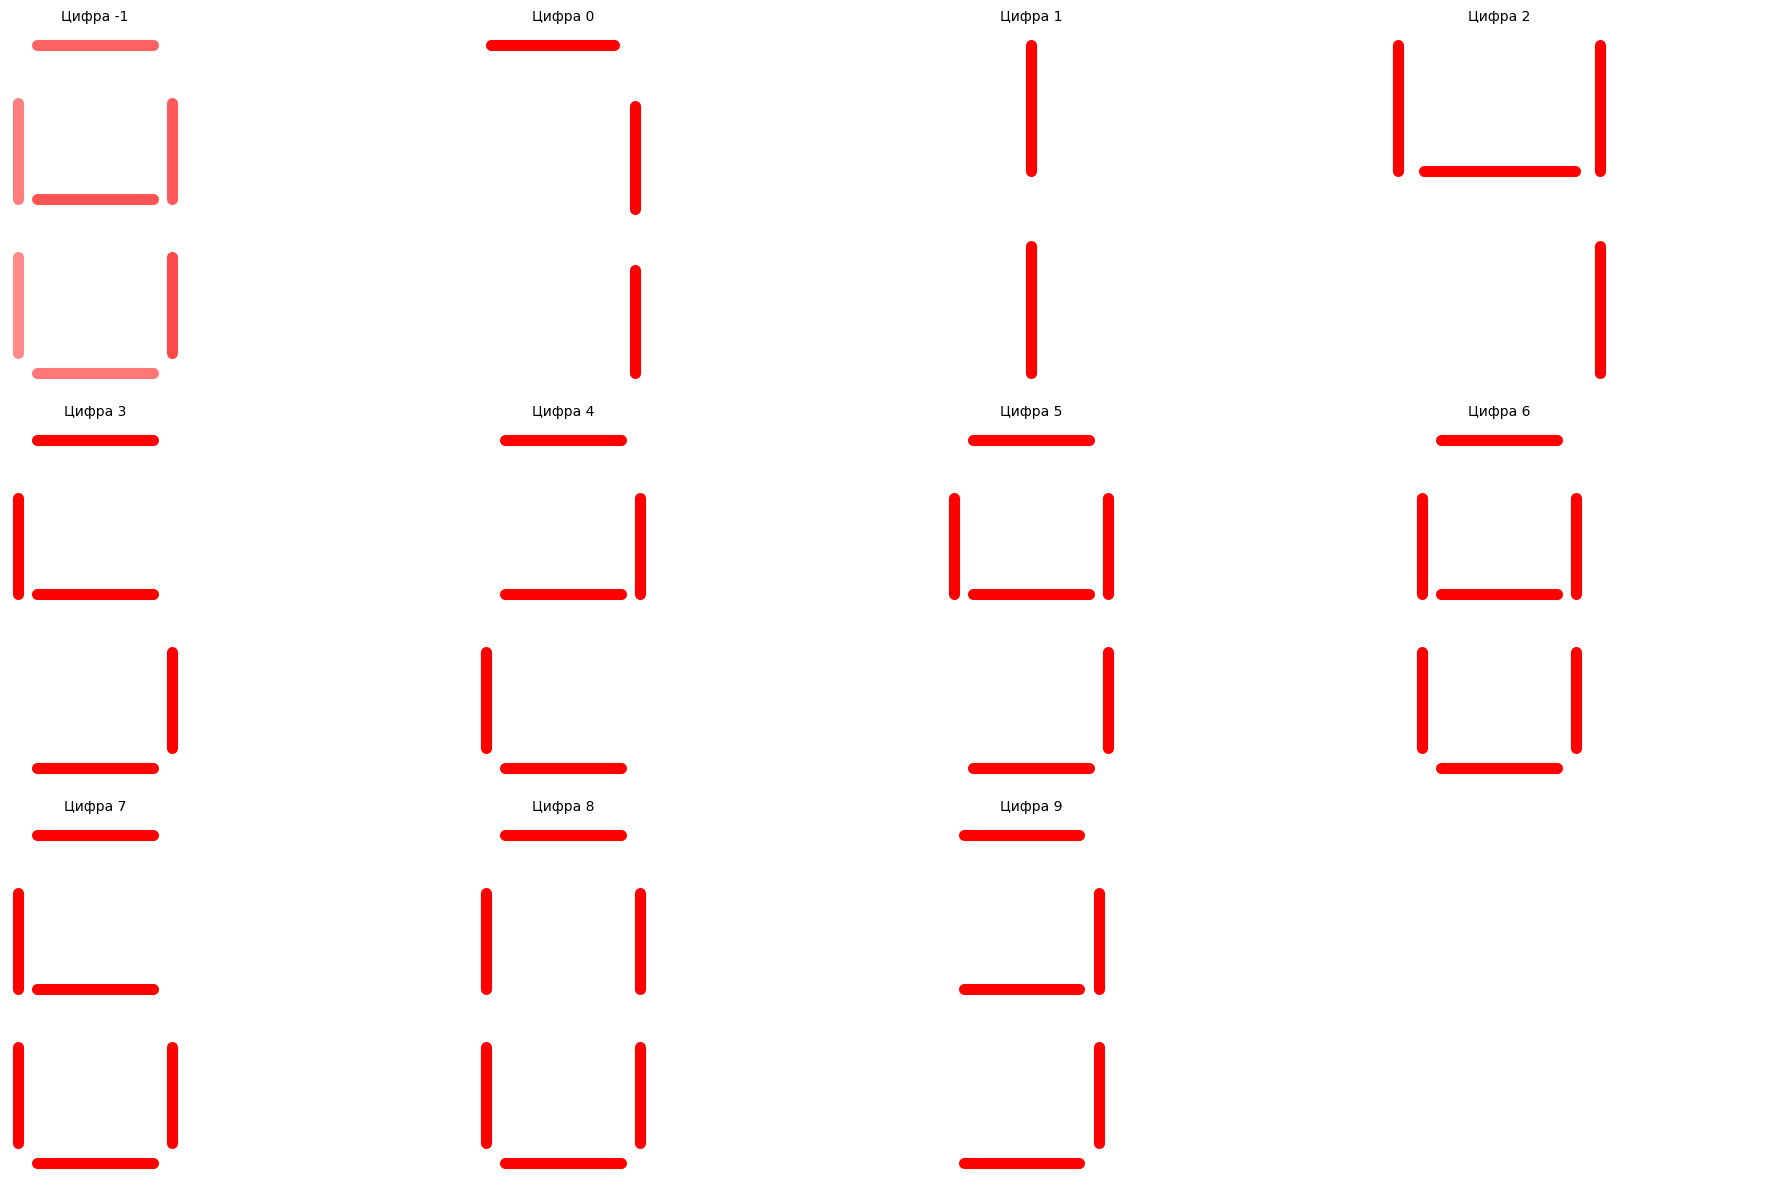

In [186]:
plot_multiple_seven_segments(df_grouped_by_cluster, ncols=4)

<Figure size 1200x600 with 0 Axes>

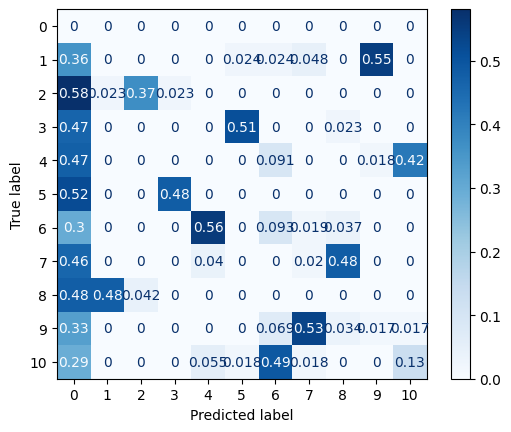

In [187]:
plt.style.use('default')
digit_map = {
        'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
        'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9
  }
df['true_label'] = df['A'].map(digit_map)

fig = plt.figure(figsize=(12, 6))
cm = confusion_matrix(df['true_label'], df['cluster'], normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

#Интерпретация:

1. Кластер 0: смешанный кластер
2. Кластер 1: цифра 7
3. Кластер 2: цифра 1
4. Кластер 3: цифрв 4
5. Кластер 4: цифра 5
6. Кластер 5: цифра 2
7. Кластер 6: цифра 9
8. Кластер 7: цифра 8
9. Кластер 8: цифра 6
10. Кластер 9: цифра 0
11. Кластер 10: цифра 3

Модель показала высокую тчность, но низкую полноту для каждой цифры.
